# Problem Statement:

**Description**

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

**Key attributes of the database**

The database includes the following indicators:

* `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
* `country_long` (text): longer form of the country designation
* `name` (text): name or title of the power plant, generally in Romanized form
* `gppd_idnr` (text): 10 or 12 character identifier for the power plant
* `capacity_mw` (number): electrical generating capacity in megawatts
* `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
* `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
* `primary_fuel` (text): energy source used in primary electricity generation or export
* `other_fuel1` (text): energy source used in electricity generation or export
* `other_fuel2` (text): energy source used in electricity generation or export
* `other_fuel3` (text): energy source used in electricity generation or export
* `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
* `owner` (text): majority shareholder of the power plant, generally in Romanized form
* `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
* `url` (text): web document corresponding to the `source` field
* `geolocation_source` (text): attribution for geolocation information
* `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
* `year_of_capacity_data` (number): year the capacity information was reported
* `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
* `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
* `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
* `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
* `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
* `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
* `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
* `generation_data_source` (text): attribution for the reported generation information
* `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
* `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
* `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
* `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
* `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
* `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
* `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
* `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
* `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
* `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

In [55]:
gpp = pd.read_csv("database_IND.csv")
gpp.head().T

,0,1,2,3,4
country,IND,IND,IND,IND,IND
country_long,India,India,India,India,India
name,ACME Solar Tower,ADITYA CEMENT WORKS,AES Saurashtra Windfarms,AGARTALA GT,AKALTARA TPP
gppd_idnr,WRI1020239,WRI1019881,WRI1026669,IND0000001,IND0000002
capacity_mw,2.5,98,39.2,135,1800
latitude,28.1839,24.7663,21.9038,23.8712,21.9603
longitude,73.2407,74.609,69.3732,91.3602,82.4091
primary_fuel,Solar,Coal,Wind,Gas,Coal
other_fuel1,NaN,NaN,NaN,NaN,Oil
other_fuel2,NaN,NaN,NaN,NaN,NaN


# EDA

In [56]:
gpp.shape

(908, 25)

In [57]:
gpp.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

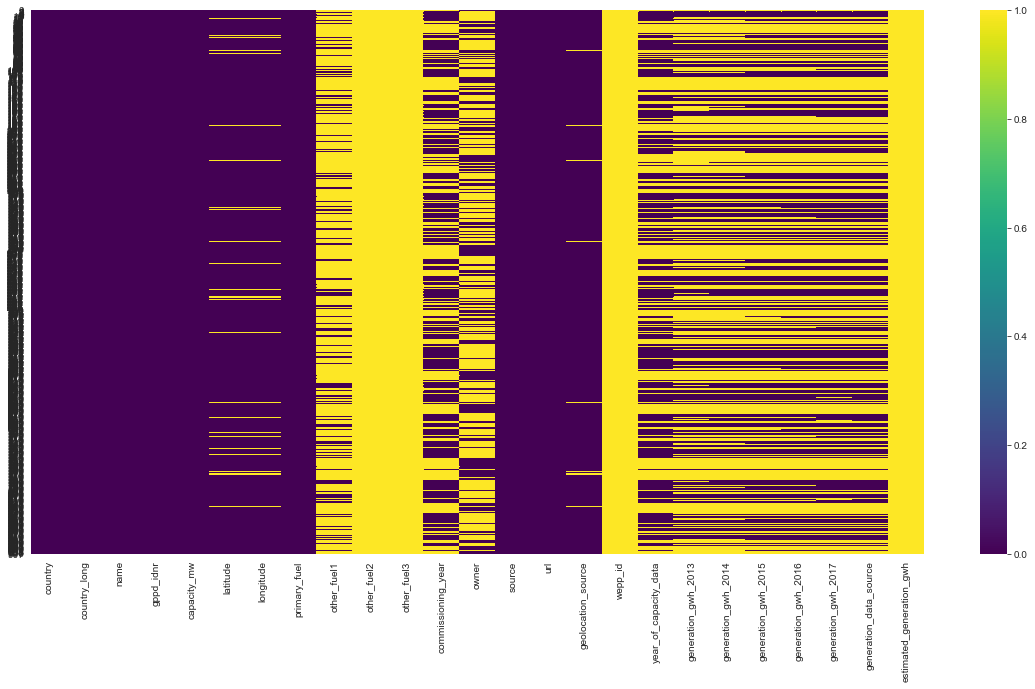

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(gpp.isnull(),yticklabels=True,cbar=True,cmap='viridis')
plt.show()

There are null values present in 17 columns

In [59]:
gpp.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

There are 12 columns with object type data while others are numerical.

In [60]:
gpp.skew()

capacity_mw                 3.193257
latitude                   -0.143622
longitude                   1.100942
other_fuel3                      NaN
commissioning_year         -1.056132
wepp_id                          NaN
year_of_capacity_data       0.000000
generation_gwh_2013         3.416338
generation_gwh_2014         3.357683
generation_gwh_2015         3.679016
generation_gwh_2016         3.524785
generation_gwh_2017         3.576849
estimated_generation_gwh         NaN
dtype: float64

There is skewness present in the data, wepp_id and estimated_generation_gwh does not contain any values

In [61]:
gpp.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

name, and gppd_idnr are identifier columns

In [62]:
gpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [63]:
gpp.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


other_fuel3, wepp_id, and estimated_generation_gwh contain 0 count as these columns does not contain any values, while other have missing values present except capacity_mw.

In [64]:
#We separate categorical and continuous features

categorical=[i for i in gpp.columns if gpp[i].nunique()<11]
continues=[i for i in gpp.columns if gpp[i].nunique()>=11]

## Univariate Analysis

In [65]:
com_year=pd.DataFrame(gpp['commissioning_year'].value_counts(ascending=True))
com_year

,commissioning_year
1969.0,1
1956.0,1
1949.0,1
1927.0,1
1939.0,1
...,...
2014.0,17
2016.0,21
2012.0,23
2015.0,26


<AxesSubplot:title={'center':'Number of Powerplants commissioned as per Year wise'}, ylabel='commissioning_year'>

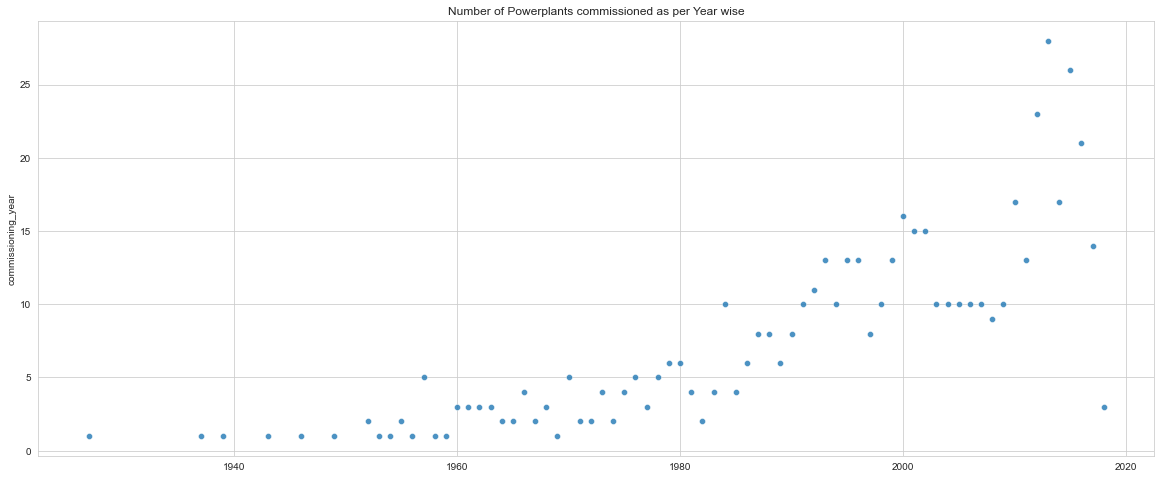

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.title('Number of Powerplants commissioned as per Year wise')
sns.scatterplot(com_year.index,com_year.commissioning_year,alpha=0.8)

The above graph shows no of plants commissioned year wise.

In [67]:
pf_list=pd.DataFrame(gpp['primary_fuel'].value_counts())
of1_list=pd.DataFrame(gpp['other_fuel1'].value_counts())
of2_list=pd.DataFrame(gpp['other_fuel2'].value_counts())
of3_list=pd.DataFrame(gpp['other_fuel3'].value_counts())

pp_fuel=pd.concat([pf_list,of1_list,of2_list,of3_list],axis=1)
pp_fuel=pp_fuel.fillna(0)
pp_fuel['total']=pp_fuel['primary_fuel']+pp_fuel['other_fuel1']+pp_fuel['other_fuel2']+pp_fuel['other_fuel3']
pp_fuel

,primary_fuel,other_fuel1,other_fuel2,other_fuel3,total
Biomass,50.0,0.0,0.0,0.0,50.0
Coal,259.0,0.0,0.0,0.0,259.0
Cogeneration,0.0,1.0,0.0,0.0,1.0
Gas,69.0,2.0,0.0,0.0,71.0
Hydro,250.0,0.0,0.0,0.0,250.0
Nuclear,9.0,0.0,0.0,0.0,9.0
Oil,21.0,196.0,1.0,0.0,218.0
Solar,127.0,0.0,0.0,0.0,127.0
Wind,123.0,0.0,0.0,0.0,123.0


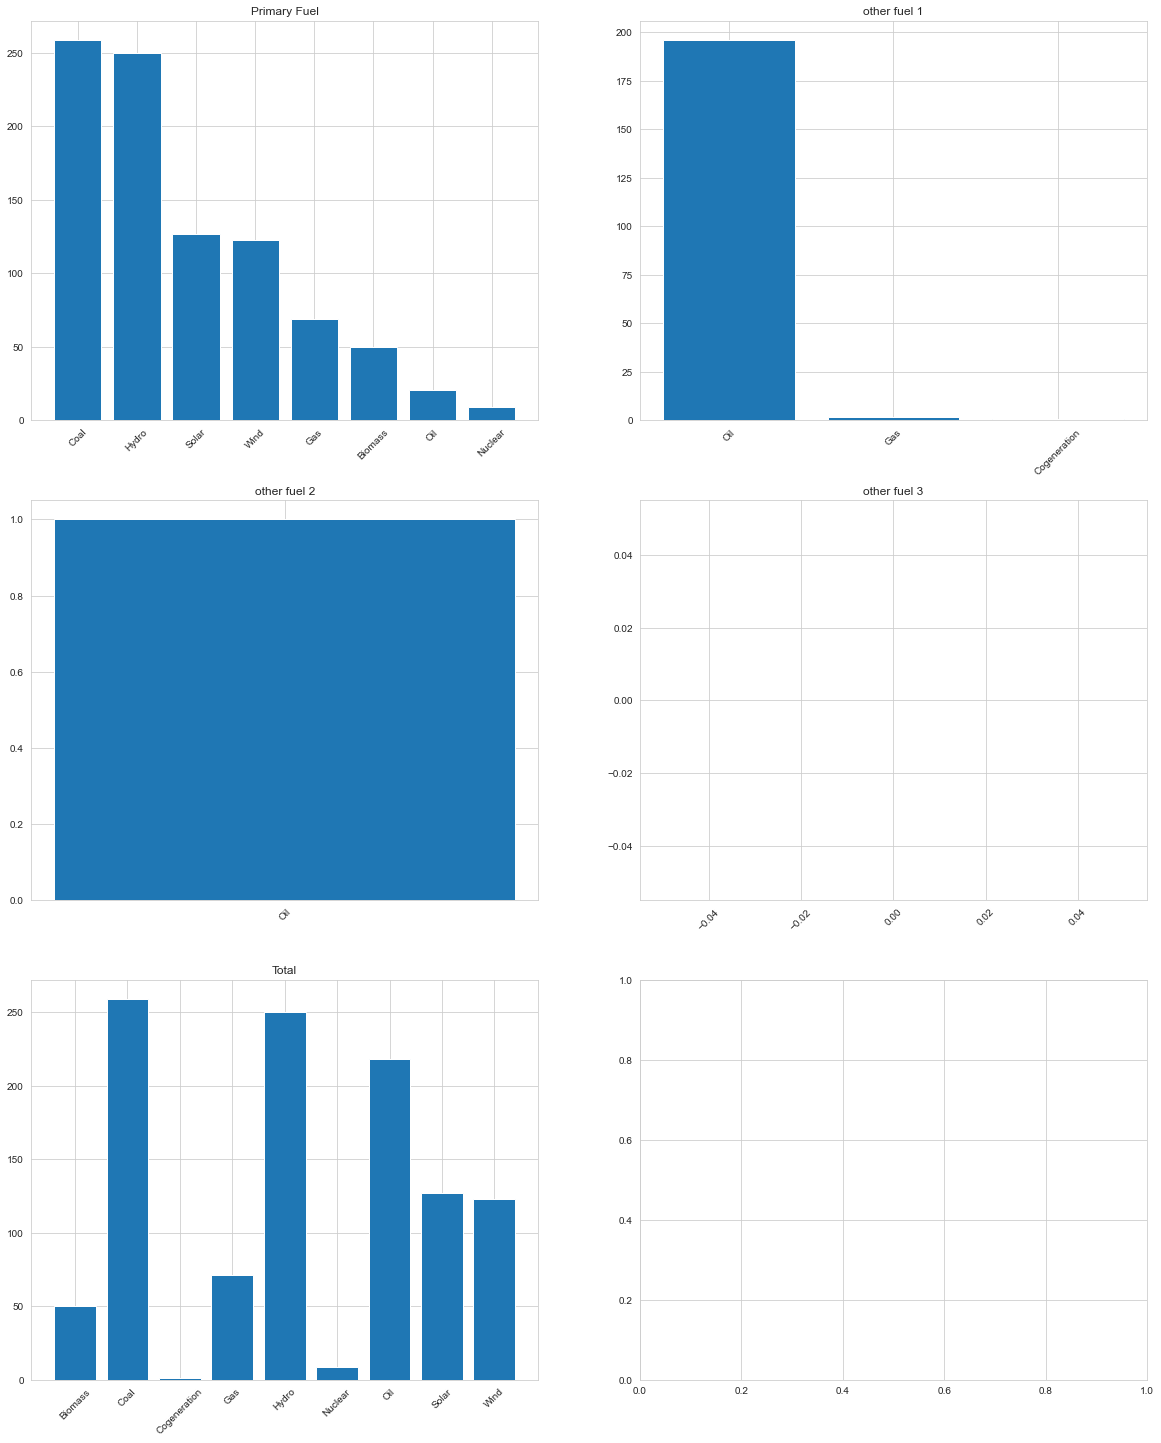

In [68]:
fig,axes=plt.subplots(3,2,figsize=(20,25))

axes[0,0].set_title('Primary Fuel')
axes[0,0].bar(pf_list.index,pf_list.primary_fuel)
axes[0,0].tick_params(axis='x', labelrotation=45)

axes[0,1].set_title('other fuel 1')
axes[0,1].bar(of1_list.index,of1_list.other_fuel1)
axes[0,1].tick_params(axis='x', labelrotation=45)

axes[1,0].set_title('other fuel 2')
axes[1,0].bar(of2_list.index,of2_list.other_fuel2)
axes[1,0].tick_params(axis='x', labelrotation=45)

axes[1,1].set_title('other fuel 3')
axes[1,1].bar(of3_list.index,of3_list.other_fuel3)
axes[1,1].tick_params(axis='x', labelrotation=45)

axes[2,0].set_title('Total')
axes[2,0].bar(pp_fuel.index,pp_fuel.total)
axes[2,0].tick_params(axis='x', labelrotation=45)
plt.show()


We can see that Coal and Hydro are the most used primary fuel. 

### How many Powerplants are commissioned after 2009?

In [69]:
gpp1=gpp[gpp['commissioning_year']>2009]
print('After 2009, {} Powerplants are comissioned in India.'.format(gpp.shape[0]))

After 2009, 908 Powerplants are comissioned in India.


### Which type of Powerplant is Commisioned most after 2009?

         primary_fuel
Coal              106
Hydro              34
Gas                13
Solar               8
Nuclear             1


<AxesSubplot:>

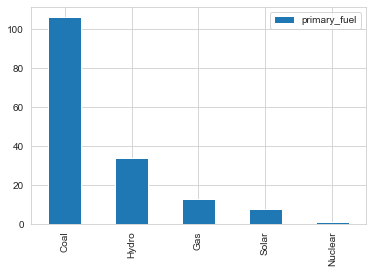

In [70]:
pp_2009=pd.DataFrame(gpp1.primary_fuel.value_counts())
print(pp_2009)
pp_2009.plot(kind='bar')

Majority of the powerplant with Coal have been commissioned after 2009

### Which type of these commissioned powerplant produces most Electricity? 

In [71]:
pp_2010=pd.DataFrame(gpp1.groupby('primary_fuel')['capacity_mw'].sum().sort_values(ascending=False))

pp_2010_sum=pp_2010['capacity_mw'].sum()
pp_2010['percentage']=pp_2010['capacity_mw']/pp_2010_sum*100
pp_2010

,capacity_mw,percentage
primary_fuel,,
Coal,107722.00,85.788730
Hydro,8172.02,6.508115
Gas,7167.09,5.707799
Nuclear,2000.00,1.592780
Solar,505.50,0.402575


Commissioned Capacity of Coal Powerplant is 107 GW. It is really a bad news because Coal and Oil based Powerplant produce toxic pollutants. 

### From 2002 to 2009, Which type of commissioned powerplant produces most Electricity?

In [72]:
gpp2=gpp[(gpp['commissioning_year']>2002)&(gpp['commissioning_year']<2010)]
print('Number of Powerplants commissioned from 2002 to 2010 are',gpp2.shape[0],'.')

pp_2002=pd.DataFrame(gpp2.groupby('primary_fuel')['capacity_mw'].sum().sort_values(ascending=False))
pp_2002_sum=pp_2002['capacity_mw'].sum()
pp_2002['percentage']=pp_2002['capacity_mw']/pp_2002_sum*100

pp_2002

Number of Powerplants commissioned from 2002 to 2010 are 69 .


,capacity_mw,percentage
primary_fuel,,
Coal,22065.000,53.299425
Hydro,10458.000,25.261971
Gas,7995.195,19.312907
Nuclear,880.000,2.125697


* In previous 8 year period(2002-2009), Commissioned capacity of Coal based powerplant is 22 GW.
* Commissioned capacity of Hydro power plants is 10 GW.

In [73]:
merge=pp_2010.join(pp_2002,lsuffix='_2018', rsuffix='_2009')
merge['%_inc']=(merge['capacity_mw_2018']-merge['capacity_mw_2009'])/merge['capacity_mw_2009']
merge

,capacity_mw_2018,percentage_2018,capacity_mw_2009,percentage_2009,%_inc
primary_fuel,,,,,
Coal,107722.00,85.788730,22065.000,53.299425,3.882030
Hydro,8172.02,6.508115,10458.000,25.261971,-0.218587
Gas,7167.09,5.707799,7995.195,19.312907,-0.103575
Nuclear,2000.00,1.592780,880.000,2.125697,1.272727
Solar,505.50,0.402575,NaN,NaN,NaN


The Commissioned Solar Powerplant capcity from 2010 to 2018 is increased than previous 8 year period.


Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

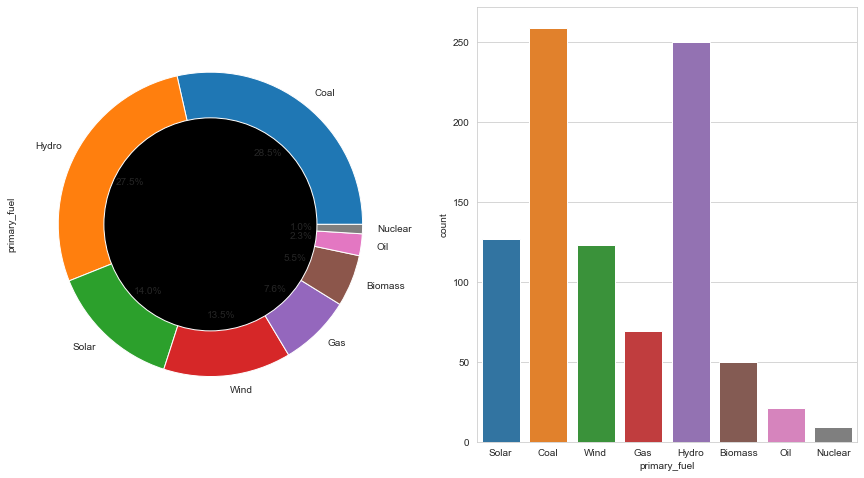

In [74]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
gpp['primary_fuel'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='black')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='primary_fuel',data=gpp)
gpp['primary_fuel'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

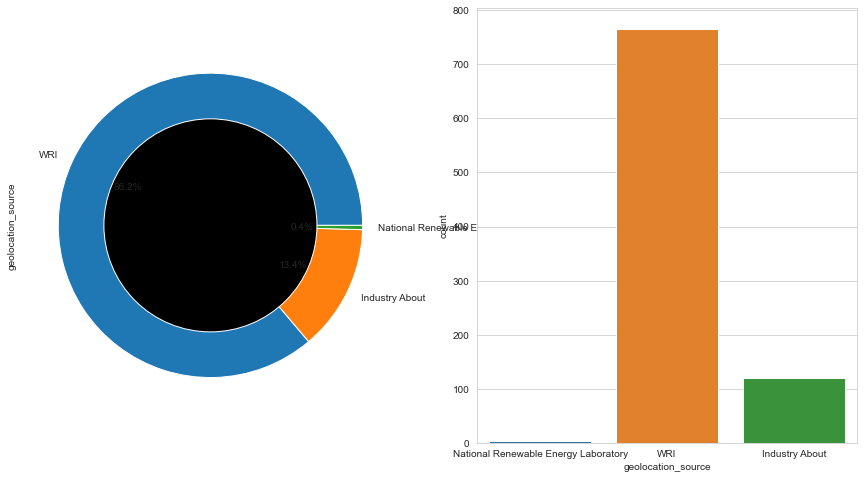

In [75]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
gpp['geolocation_source'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='black')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='geolocation_source',data=gpp)
gpp['geolocation_source'].value_counts()

<AxesSubplot:>

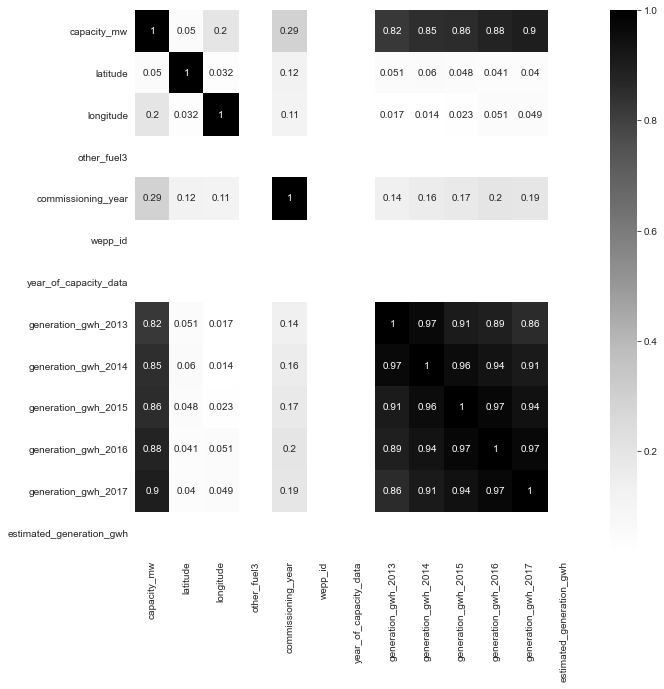

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(gpp.corr(),annot=True,cmap='Greys')

generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016 and generation_gwh_2017 are highly correlated with capacity_mw.

# Pre-processing

### Dropping unnecessary columns

In [77]:
gpp.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [78]:
gpp.drop(['country','country_long','name','gppd_idnr','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

In [79]:
gpp.drop(['year_of_capacity_data'],axis=1,inplace=True)

In [80]:
gpp.head().T

,0,1,2,3,4
capacity_mw,2.5,98,39.2,135,1800
latitude,28.1839,24.7663,21.9038,23.8712,21.9603
longitude,73.2407,74.609,69.3732,91.3602,82.4091
primary_fuel,Solar,Coal,Wind,Gas,Coal
other_fuel1,NaN,NaN,NaN,NaN,Oil
commissioning_year,2011,NaN,NaN,2004,2015
owner,Solar Paces,Ultratech Cement ltd,AES,NaN,NaN
source,National Renewable Energy Laboratory,Ultratech Cement ltd,CDM,Central Electricity Authority,Central Electricity Authority
url,http://www.nrel.gov/csp/solarpaces/project_det...,http://www.ultratechcement.com/,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,http://www.cea.nic.in/,http://www.cea.nic.in/
geolocation_source,National Renewable Energy Laboratory,WRI,WRI,WRI,WRI


In [81]:
#Imputing null values of categorical features with mode
gpp['other_fuel1'].fillna(gpp['other_fuel1'].mode()[0],inplace=True)
gpp['geolocation_source'].fillna(gpp['geolocation_source'].mode()[0],inplace=True)
gpp['owner'].fillna(gpp['owner'].mode()[0],inplace=True)
gpp['commissioning_year'].fillna(gpp['commissioning_year'].mode()[0],inplace=True)
gpp['generation_data_source'].fillna(gpp['generation_data_source'].mode()[0],inplace=True)

#filling the missing generation_gwh pers years to 0
gpp.generation_gwh_2013=gpp.generation_gwh_2013.fillna(0)
gpp.generation_gwh_2014=gpp.generation_gwh_2014.fillna(0)
gpp.generation_gwh_2015=gpp.generation_gwh_2015.fillna(0)
gpp.generation_gwh_2016=gpp.generation_gwh_2016.fillna(0)
gpp.generation_gwh_2017=gpp.generation_gwh_2017.fillna(0)

##Imputing null values of continues features with median
gpp['latitude'].fillna(gpp['latitude'].median(),inplace=True)
gpp['longitude'].fillna(gpp['longitude'].median(),inplace=True)

<AxesSubplot:>

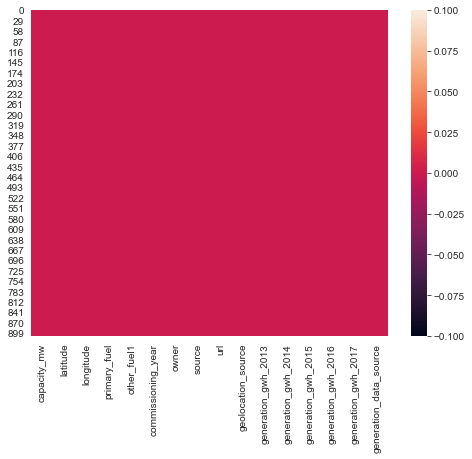

In [82]:
#checking for null values now
plt.figure(figsize=(8,6))
sns.heatmap(gpp.isnull())

All the null valuse are removed now.

In [83]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [84]:
#We use Label encoder
for i in gpp.columns:
    if gpp[i].dtypes=='O':
        gpp[i]=l.fit_transform(gpp[i].values.reshape(-1,1))

### Removing Skewness

In [90]:
cont=['capacity_mw','latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
for i in cont:
    print(i,gpp[i].skew())

capacity_mw 3.1932573023446458
latitude -0.16181051280512945
longitude 1.150963154131737
generation_gwh_2013 5.158052715741295
generation_gwh_2014 4.989441061471033
generation_gwh_2015 5.264211007281125
generation_gwh_2016 4.988235364991261
generation_gwh_2017 4.983065055041694


In [93]:
#using Power transformer to remove skewness
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

for i in cont:
    if np.abs(gpp[i].skew())>0.5:
        gpp[i]=pt.fit_transform(gpp[i].values.reshape(-1,1))

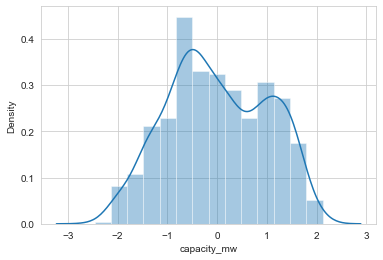

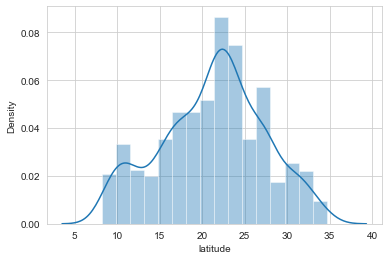

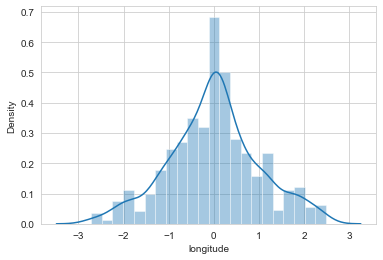

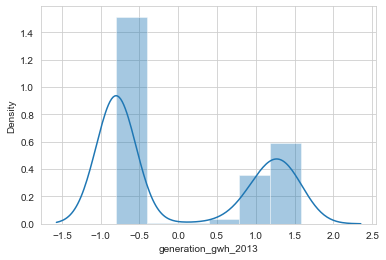

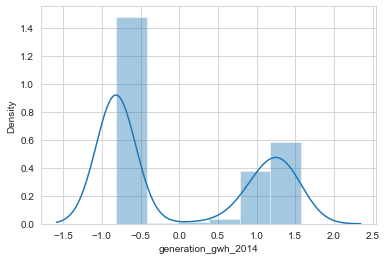

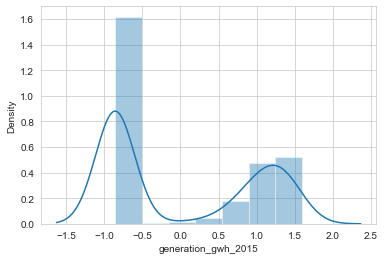

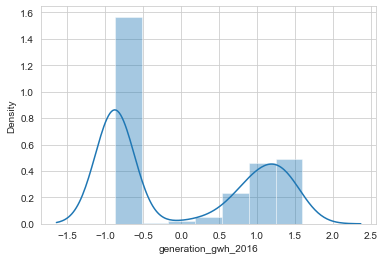

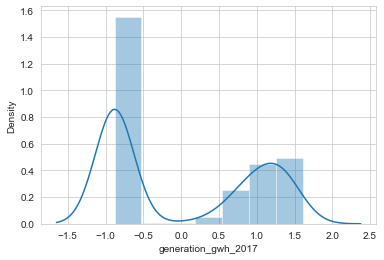

<Figure size 432x288 with 0 Axes>

In [94]:
#checking skewness after removing
for i in cont:
    sns.distplot(gpp[i])
    plt.figure()


A lot of skewness has been resuced but we cannot remove skewness more than this.

### Preparing the variables with respect to primary_fuel

In [95]:
#Separating dependent and independent features.
x=gpp.copy()
x.drop('primary_fuel',axis=1,inplace=True)
y=gpp['primary_fuel']

## Scaling the data

In [96]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [97]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

# Building Machine Learning Models w.r.t primary_fuel

Importing Libraries

In [98]:
from sklearn.model_selection import train_test_split,cross_val_score

#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [99]:
#importing metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [100]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=1000
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [101]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),SVR(),LinearRegression(),Lasso(),Ridge(),ElasticNet(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

names=['KNeighborsRegressor','SVR','LinearRegression','Lasso','Ridge','ElasticNet','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']

In [104]:
#Creating methord for the models and appending them to data frame

def createmodels(model_list,independent,dependent,n):
    xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.25,random_state=randomstate(independent,dependent))
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,independent,dependent,cv=10)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2))
        mcv.append(np.round(np.mean(score),4))
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross validaton Score']=mcv
    data.set_index('Model',inplace = True)
    return data

In [105]:
createmodels(models,x,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,0.4141,0.5441,0.7377,8.800000e-01,0.8580
SVR,0.5617,0.6548,0.8092,8.400000e-01,0.7919
LinearRegression,0.7770,0.9897,0.9948,7.000000e-01,0.7004
Lasso,1.9345,5.2170,2.2841,-2.645313e+31,-0.0742
Ridge,0.7912,1.0159,1.0079,6.800000e-01,0.7027
ElasticNet,1.9345,5.2170,2.2841,-2.645313e+31,-0.0742
DecisionTreeRegressor,0.4273,1.0705,1.0346,7.900000e-01,0.8107
RandomForestRegressor,0.3364,0.3559,0.5965,9.200000e-01,0.8928
AdaBoostRegressor,0.7235,0.9339,0.9664,7.200000e-01,0.8120


Random Forest, Gradient Boost, Xtreme Gradient Boost give us the best performance, so we further try hyperparameter tuning on them

## Hyperparameter Tuning

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [109]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

### Random Forest

In [110]:
params={'n_estimators':[100, 300, 500, 700],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
            'max_depth':[None,1,2,3,4,5,6,7,8]}

g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10)

g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 300, 500, 700]})

In [111]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(min_samples_leaf=3, min_samples_split=3, n_estimators=700)
{'n_estimators': 700, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': None}
0.8654205408564712


In [112]:
m=RandomForestRegressor(min_samples_leaf=3, min_samples_split=3,n_estimators=700)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [114]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.3529
Mean Squared Error is 0.3818
Root Mean Squared Error is 0.6179
R2 Score is 91.46
Mean of cross validaton Score is 88.5018


### GradientBoostingRegressor

In [116]:
params={'subsample':[0.5,1],
      'max_depth':[6,7,8,9,10,None]}

g=RandomizedSearchCV(GradientBoostingRegressor(),params,cv=10)

g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                   param_distributions={'max_depth': [6, 7, 8, 9, 10, None],
                                        'subsample': [0.5, 1]})

In [117]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'subsample': 0.5, 'max_depth': 10}
GradientBoostingRegressor(max_depth=10, subsample=0.5)
0.8915492696819228


In [118]:
m=GradientBoostingRegressor(max_depth=10, subsample=0.5)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [119]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.3615
Mean Squared Error is 0.3554
Root Mean Squared Error is 0.5961
R2 Score is 92.41
Mean of cross validaton Score is 88.6185


#### XGBRegressor

In [120]:
params={
 "learning_rate"    : [0.001,0.05, 0.10, ] ,
 "max_depth"        : [ 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

g=RandomizedSearchCV(XGBRegressor(verbosity=0),params,cv=10)

g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...one,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          re

In [121]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)
{'min_child_weight': 7, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.7}
0.8803144368911212


In [122]:
m=XGBRegressor(colsample_bytree=0.7,gamma=0.3,learning_rate=0.1,max_depth=15,min_child_weight=7)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [123]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.4666
Mean Squared Error is 0.4847
Root Mean Squared Error is 0.6962
R2 Score is 88.2
Mean of cross validaton Score is 88.8744


GradientBoostingRegressor is giving the best performance with minimum error compared to all the models, so we choose it as out final model.

# Finalizing the Model

In [127]:
model1=GradientBoostingRegressor(max_depth=10, subsample=0.5)
model1.fit(xtrain,ytrain)
p1=model1.predict(xtest)
score1=cross_val_score(model1,x,y,cv=10)

### Evaluation Metrics

In [128]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p1,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p1,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p1,ytest)),4))
print('R2 Score is',np.round(r2_score(p1,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.3463
Mean Squared Error is 0.3572
Root Mean Squared Error is 0.5976
R2 Score is 92.28
Mean of cross validaton Score is 88.8744


Text(0.5, 1.0, 'GradientBoostingRegressor')

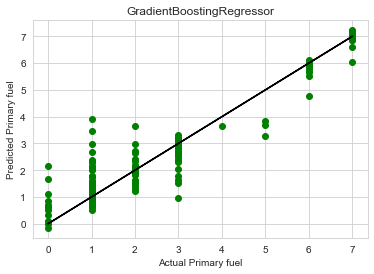

In [129]:
plt.scatter(x=ytest,y=p1,color='g')
plt.plot(ytest,ytest,color='k')
plt.xlabel('Actual Primary fuel')
plt.ylabel('Predicted Primary fuel')
plt.title('GradientBoostingRegressor')

### Preparing the variables with respect to capacity_mw

In [130]:
#Separating dependent and independent features with respect to capacity_mw.
x=gpp.copy()
x.drop('capacity_mw',axis=1,inplace=True)
y=gpp['capacity_mw']

In [131]:
#Scaling the data using min max scaler
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

## Building Machine Learning Models w.r.t capacity_mw

In [132]:
createmodels(models,x,y,names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,0.3233,0.1922,0.4384,7.500000e-01,0.7199
SVR,0.3058,0.1746,0.4179,7.700000e-01,0.7707
LinearRegression,0.3791,0.2297,0.4793,6.900000e-01,0.7022
Lasso,0.7722,0.8526,0.9234,-1.133330e+36,-0.0216
Ridge,0.3806,0.2306,0.4802,6.800000e-01,0.7107
ElasticNet,0.7722,0.8526,0.9234,-1.133330e+36,-0.0216
DecisionTreeRegressor,0.3506,0.2719,0.5214,6.900000e-01,0.6434
RandomForestRegressor,0.2617,0.1292,0.3594,8.300000e-01,0.7967
AdaBoostRegressor,0.3409,0.1943,0.4407,7.000000e-01,0.7510


Random Forest, Gradient Boost, Xtreme Gradient Boost give us the best performance, so we further try hyperparameter tuning on them

### Hyperparameter tuning

In [133]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

#### Random Forest

In [134]:
params={'n_estimators':[100, 300, 500, 700],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
            'max_depth':[None,1,2,3,4,5,6,7,8]}

g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10)

g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 300, 500, 700]})

In [135]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=4)
{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': None}
0.7992513023815812


In [136]:
m=RandomForestRegressor(min_samples_leaf=2, min_samples_split=4,n_estimators=100)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [137]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.2563
Mean Squared Error is 0.1317
Root Mean Squared Error is 0.3629
R2 Score is 82.66
Mean of cross validaton Score is 79.1544


#### GradientBoostingRegressor

In [138]:
params={'subsample':[0.5,1],
      'max_depth':[6,7,8,9,10,None]}

g=RandomizedSearchCV(GradientBoostingRegressor(),params,cv=10)

g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                   param_distributions={'max_depth': [6, 7, 8, 9, 10, None],
                                        'subsample': [0.5, 1]})

In [139]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

GradientBoostingRegressor(max_depth=7, subsample=0.5)
{'subsample': 0.5, 'max_depth': 7}
0.7897578581506803


In [140]:
m=GradientBoostingRegressor(max_depth=7, subsample=0.5)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [141]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.2841
Mean Squared Error is 0.1465
Root Mean Squared Error is 0.3827
R2 Score is 81.91000000000001
Mean of cross validaton Score is 79.3468


#### XGBRegressor

In [142]:
params={
 "learning_rate"    : [0.001,0.05, 0.10, ] ,
 "max_depth"        : [ 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

g=RandomizedSearchCV(XGBRegressor(verbosity=0),params,cv=10)

g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...one,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          re

In [143]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)
{'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.3}
0.8148364478687574


In [144]:
m=XGBRegressor(colsample_bytree=0.3,gamma=0.2,learning_rate=0.01,max_depth=10,min_child_weight=7)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [145]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.4309
Mean Squared Error is 0.3013
Root Mean Squared Error is 0.549
R2 Score is -22.720000000000002
Mean of cross validaton Score is 61.5766


Random Forest is giving the best performance with minimum error compared to all the models, so we choose it as out final model.

# Finalizing the Model for capacity_mw

In [146]:
model2=RandomForestRegressor(min_samples_leaf=2, min_samples_split=4,n_estimators=100)
model2.fit(xtrain,ytrain)
p2=model2.predict(xtest)
score2=cross_val_score(model2,x,y,cv=10)

### Evaluation Metrics

In [147]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p2,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p2,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p2,ytest)),4))
print('R2 Score is',np.round(r2_score(p2,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score2)*100,4))

Mean Absolute Error is 0.256
Mean Squared Error is 0.127
Root Mean Squared Error is 0.3563
R2 Score is 83.41
Mean of cross validaton Score is 79.6376


Text(0.5, 1.0, 'RandomForestRegressor')

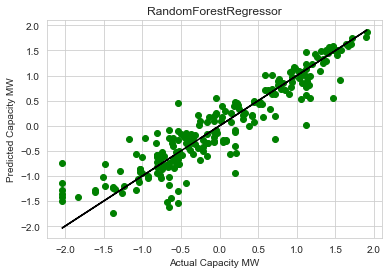

In [148]:
plt.scatter(x=ytest,y=p2,color='g')
plt.plot(ytest,ytest,color='k')
plt.xlabel('Actual Capacity MW')
plt.ylabel('Predicted Capacity MW')
plt.title('RandomForestRegressor')

# Saving the Model

In [149]:
#saving the model for Primary Fuel    
import joblib
joblib.dump(model1,'powerplant.obj')

['powerplant.obj']

In [150]:
#saving the model for capacity_mw    
import joblib
joblib.dump(model2,'powerplantcapacity.obj')

['powerplantcapacity.obj']